## Model Generation

In [31]:
import pandas as pd
from tqdm import *
import numpy as np
import feather as fe
pd.set_option('display.max_columns', 500)

In [2]:
data = fe.read_dataframe('data_post_EDu')

NameError: name 'data' is not defined

In [693]:
data.columns

Index(['additional_info', 'rb', 'name', 'id', 'summary_title', 'location',
       'current_job_company', 'current_job_title', 'current_job_desc',
       'current_job_duration', 'prev_job_company', 'prev_job_title',
       'prev_job_desc', 'prev_job_duration', 'total_exp_durations',
       'education1_title', 'education1_college', 'education1_duration',
       'education2_title', 'education2_college', 'education2_duration',
       'education3_title', 'education3_college', 'education3_duration',
       'skils', 'links', 'certifications', 'awards', 'work_auth',
       'current_job_duration_months', 'prev_job_duration_months',
       'total_exp_durations_months', 'work_authp', 'prev_job_desc_clean',
       'prev_job_title_cats', 'skill_0', 'skill_1', 'skill_2', 'skill_3',
       'skill_4', 'skill_5', 'skill_6', 'skill_7', 'skill_8', 'skill_9',
       'skill_10', 'skill_11', 'current_job_title_refined', 'has_github',
       'has_linked', 'highest_edu_level', 'highest_edu_field_cat',
       

In [5]:
data=data.rename(columns = {'0':'skill_0', '1':'skill_1', '2':'skill_2', '3':'skill_3', '4':'skill_4', '5':'skill_5', '6':'skill_6', '7':'skill_7', '8':'skill_8', '9':'skill_9', '10':'skill_10','11':'skill_11'})

In [6]:
data = pd.get_dummies(data, prefix='tier', columns=['tier_education1_college'])

#### filter only data scientist

In [8]:
comp_counts= data.groupby('data_current_comp_namef').agg('count').reset_index()[['data_current_comp_namef','name']]

In [21]:
comp_counts = comp_counts.rename({'name':'comp_ds_count'}, axis='columns')

In [25]:
data = data.merge(comp_counts, how='left', on='data_current_comp_namef')

In [60]:
cat_cols = ['prev_job_title_cats','highest_edu_level','highest_edu_field_cat']

In [609]:
def get_y(row):
    cur_title =row['current_job_title_refined']
    ds_cnt = row['comp_ds_count']
    emp_cnt = row['data_current_comp_employeef']
    
    if cur_title=='Data Scientist':
        return 1
#     elif ds_cnt<3:
#         return 0
#     elif emp_cnt<3000:
#         return 0
    else:
        return 0

In [610]:
for i, row in tqdm(data.iterrows()):
    data.loc[i,'target']= get_y(row)

12274it [00:05, 2358.27it/s]


In [611]:
data.target.value_counts()

0.0    7143
1.0    5131
Name: target, dtype: int64

In [251]:
data.current_job_title_refined.value_counts()

Data Scientist      5131
Student             1847
Others              1749
Data Analyst         971
Project Manager      947
Business Analyst     922
Software Engg        707
Name: current_job_title_refined, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le1 = LabelEncoder()
data['prev_job_title_cats_le']= le1.fit_transform(data['prev_job_title_cats'])
le2 = LabelEncoder()
data['highest_edu_level_le']= le2.fit_transform(data['highest_edu_level'])
le3 = LabelEncoder()
data['highest_edu_field_cat_le']= le3.fit_transform(data['highest_edu_field_cat'])

In [708]:
col_interest = ['skill_0','skill_1','skill_2','skill_3','skill_4','skill_5','skill_6','skill_7','skill_8','skill_9','skill_10','skill_11','prev_job_duration_months','total_exp_durations_months','work_authp', 'has_github','has_linked','tier_1.0','tier_2.0','tier_3.0','tier_4.0','tier_5.0','tier_6.0','prev_job_title_cats_le','highest_edu_level_le','highest_edu_field_cat_le','prev_job_title_cats_le_mean_enc','highest_edu_level_le_mean_enc', 'highest_edu_field_cat_le_mean_enc']
col_interest = ['prev_job_duration_months','total_exp_durations_months','work_authp', 'has_github','has_linked','tier_1.0','tier_2.0','tier_3.0','tier_4.0','tier_5.0','tier_6.0','prev_job_title_cats_le','highest_edu_level_le','highest_edu_field_cat_le','prev_job_title_cats_le_mean_enc','highest_edu_level_le_mean_enc', 'highest_edu_field_cat_le_mean_enc']

In [709]:
data_interest = data[col_interest].copy()

In [721]:
data.head()

,additional_info,rb,name,id,summary_title,location,current_job_company,current_job_title,current_job_desc,current_job_duration,prev_job_company,prev_job_title,prev_job_desc,prev_job_duration,total_exp_durations,education1_title,education1_college,education1_duration,education2_title,education2_college,education2_duration,education3_title,education3_college,education3_duration,skils,links,certifications,awards,work_auth,current_job_duration_months,prev_job_duration_months,total_exp_durations_months,work_authp,prev_job_desc_clean,prev_job_title_cats,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10,skill_11,current_job_title_refined,has_github,has_linked,highest_edu_level,highest_edu_field_cat,data_current_comp_name,data_current_comp_type,data_current_comp_employee,data_current_comp_name1,data_current_comp_type1,data_current_comp_employee1,data_current_comp_name2,data_current_comp_type2,data_current_comp_employee2,data_current_comp_namef,data_current_comp_typef,data_current_comp_employeef,uni_corr,tier_education2_college,uni_corr2,tier_1.0,tier_2.0,tier_3.0,tier_4.0,tier_5.0,tier_6.0,comp_ds_count,target,prev_job_title_cats_le,highest_edu_level_le,highest_edu_field_cat_le,prev_job_title_cats_le_mean_enc,highest_edu_level_le_mean_enc,highest_edu_field_cat_le_mean_enc
0,"['TECHNICAL SKILLS\xa0', <br/>, '\xa0', <br/>,...",NaN,Tracy-Ruan,c47f7ac095973653?sp=0,Data Scientist Intern,"San Francisco, CA",None,Data Scientist Intern,['• Prepared customer behavior datasets for cl...,August 2017 to November 2017,None,Web Designer Assistant,['• Maintained university website (HTML ...,September 2015 to January 2016,"['August 2017 to November 2017', 'September 20...",B.S. in Data Science,university san francisco,January 2013 to May 2017,None,None,None,None,None,None,"[['JAVASCRIPT (Less than 1 year)'], ['PYTHON (...",['https://github.com/tracyruan007'],[],[],Authorized to work in the US for any employer,3,4,8,1.0,"['maintained', 'university', 'website', 'html'...",Software Engg,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.736292,0.006410,0.006410,0.199605,0.006410,0.006411,Data Scientist,1,0,Bachelor,DS,NantHealth,public,922.0,None,None,NaN,None,None,NaN,NantHealth,public,922.0,NaN,6.0,NaN,0,0,0,0,0,1,6.0,1.0,5,0,3,0.372144,0.348071,0.455072
1,"['TECHNICAL SKILLS:\xa0', <br/>, 'Languages ...",NaN,Sai-Nadimpalli,19e0d35744cc56a6?sp=0,Junior Data Scientist,"Kansas City, MO",Sprint Corporation,Junior Data Scientist,['• Developed a Hybrid Recommendation System f...,May 2017 to August 2017,['IBM'],Software Development Engineer Intern,['• Developed Web and Android Applications for...,September 2015 to January 2016,"['May 2017 to August 2017', 'September 2015 to...",Master of Science in Computer Science in Compu...,university missouri,May 2018,Technology,K L University,May 2016,None,None,None,"[['C (Less than 1 year)'], ['CSS (Less than 1 ...",[],[],[],None,3,4,7,NaN,"['developed', 'web', 'android', 'application',...",Student,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.956348,0.003968,0.003968,Data Scientist,0,0,Masters,CS,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,Sprint Corporation,subsidiary,69735.0,NaN,6.0,NaN,0,0,0,0,0,1,12.0,1.0,6,1,2,0.418344,0.434819,0.405014
2,"['TECHNICAL SKILLS\xa0', <br/>, '• Proficien...",NaN,Nick-Shi,accfd33784428f69?sp=0,Data Scientist Intern,"Malibu, CA",MarketPsych Data,Data Scientist Intern,['• Manipulated and interpreted insights fro...,February 2018 to Present,None,Technical Consultant,['• Manipulated 12 year historical option da...,January 2018 to Present,"['February 2018 to Present', 'January 2018 to ...",Master of Science in Applied Finance,pepperdine university graziadio school busines...,December 2017,Master of Science in Computing,Imperial College London,October 2016,Bachelor of Science in Software Engineering,"The University of Nottingham, School of 

In [711]:
for c in data_interest.columns:
    print(c, np.sum(data_interest[c].isna()))

prev_job_duration_months 0
total_exp_durations_months 0
work_authp 4019
has_github 0
has_linked 0
tier_1.0 0
tier_2.0 0
tier_3.0 0
tier_4.0 0
tier_5.0 0
tier_6.0 0
prev_job_title_cats_le 0
highest_edu_level_le 0
highest_edu_field_cat_le 0
prev_job_title_cats_le_mean_enc 0
highest_edu_level_le_mean_enc 0
highest_edu_field_cat_le_mean_enc 0


In [698]:
data_interest.work_authp = data_interest.work_authp.fillna(-1)

In [279]:
from sklearn.ensemble import RandomForestClassifier

In [577]:
clf = RandomForestClassifier(max_depth=20,random_state=0,min_samples_leaf=3, n_estimators=500, n_jobs=-1,oob_score=True)

In [578]:
clf.fit(data_interest, data.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [579]:
clf.score(data_interest, data.target), clf.oob_score_

(0.8645103470751181, 0.6521101515398403)

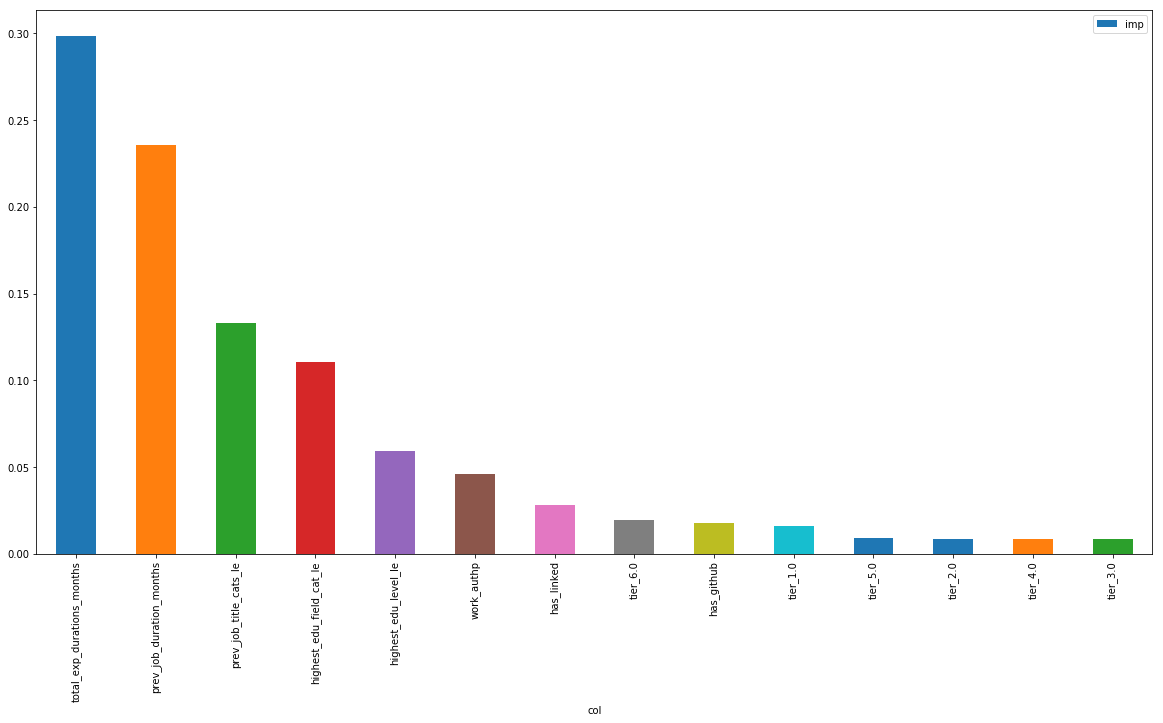

In [397]:
pd.DataFrame({'col':data_interest.columns, 'imp':clf.feature_importances_}).sort_values('imp', ascending=False).plot(x='col', y='imp', kind='bar', figsize=(20,10))

In [398]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [399]:
accuracy_score(data.target, clf.predict(data_interest))

0.8773830861984683

In [580]:
cm = confusion_matrix(data.target, clf.predict(data_interest))

In [581]:
print(cm)

[[4098 1198]
 [ 465 6513]]


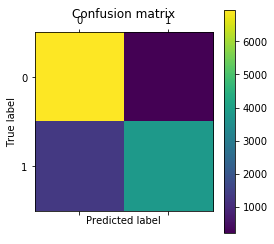

In [690]:
def reg_target_encoding(train, col, target='target'):
    """ Computes regularize mean encoding.
    Inputs:
       train: training dataframe
    """
    
    new_col_name='%s_mean_enc'%col 
    
    
    temp = train.groupby(col)[target].mean()
    train[new_col_name]= train[col].map(temp)
    global_mean = train[target].mean()
    train[new_col_name] = train[new_col_name].fillna(global_mean)

In [692]:
reg_target_encoding(data, 'prev_job_title_cats_le')
reg_target_encoding(data, 'highest_edu_level_le')
reg_target_encoding(data, 'highest_edu_field_cat_le')

### LightGBM

In [411]:
import lightgbm as lgb
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [716]:
X_train, X_test, y_train, y_test = train_test_split(data_interest,data.target , stratify=data.target ,test_size=0.15, random_state=17)
gbm = lgb.LGBMClassifier(objective='binary',
                        max_depth=10,
                        num_leaves=100,
                        verbose =2,
                        min_data_in_leaf=50,
                        metric = ['acc'],
                        learning_rate=0.1,
                        max_bin=100,
                        reg_alpha=0.3, reg_lambda=0.3,
                        colsample_bytree=0.8,
                        n_estimators=5000)
gbm.fit(X_train, y_train,eval_metric=['acc'])
print(gbm.score(X_train,y_train),gbm.score(X_test,y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9929064417177914 0.5808903365906624


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


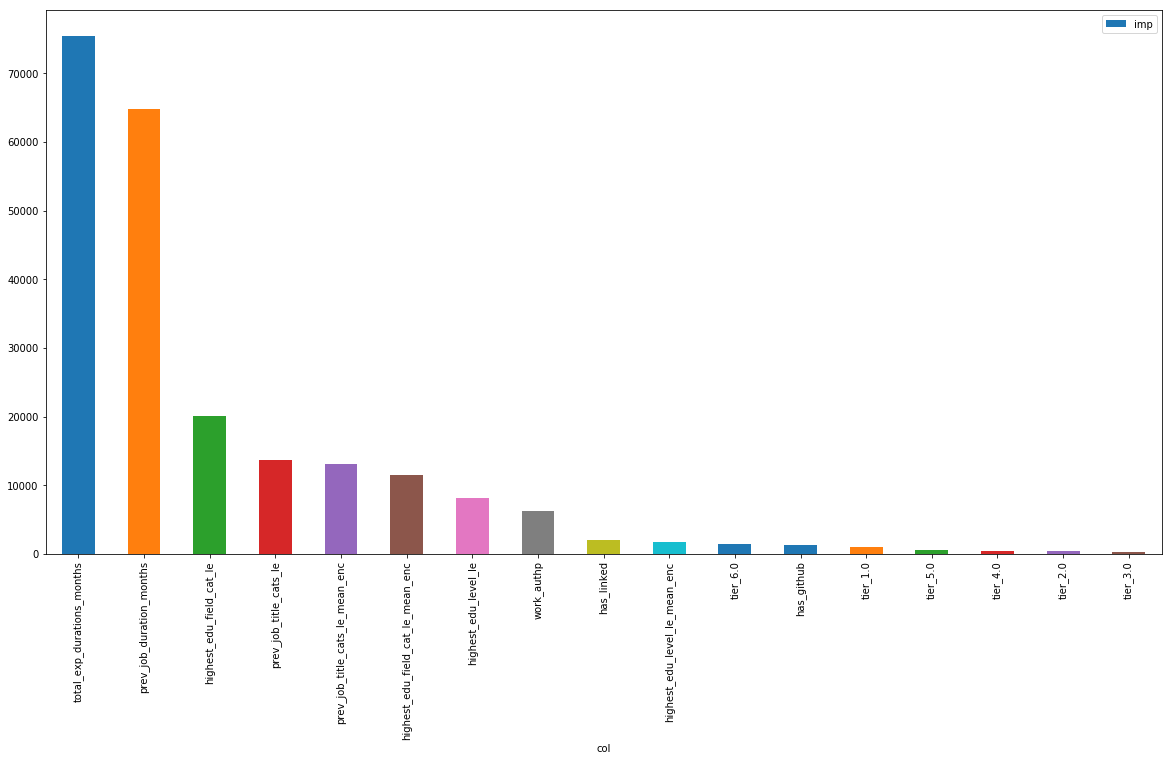

In [717]:
pd.DataFrame({'col':data_interest.columns, 'imp':gbm.feature_importances_}).sort_values('imp', ascending=False).plot(x='col', y='imp', kind='bar', figsize=(20,10))

[[712 360]
 [412 358]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


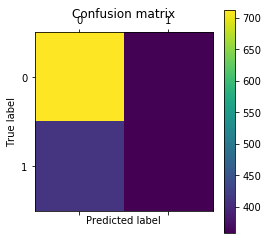

In [718]:
cm=confusion_matrix(y_test, gbm.predict(X_test))
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[[6044   27]
 [  47 4314]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


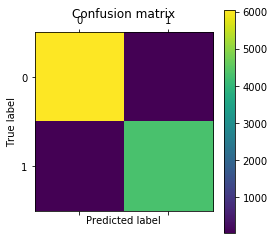

In [719]:
cm=confusion_matrix(y_train, gbm.predict(X_train))
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Xgboost

In [569]:
from xgboost import XGBClassifier

In [616]:
X_train, X_test, y_train, y_test = train_test_split(data_interest,data.target , stratify=data.target ,test_size=0.2, random_state=15)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb.score(X_train,y_train),xgb.score(X_test,y_test))

0.6483348609838069 0.629735234215886


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[1209  220]
 [ 689  337]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


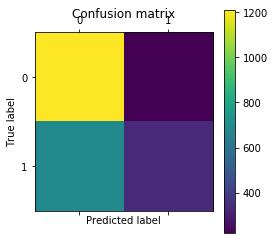

In [617]:
cm=confusion_matrix(y_test, xgb.predict(X_test))
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
t1 = xgb.predict(X_test)
t2 = gbm.predict(X_test)

In [619]:
np.sum(t1), np.sum(t2)

(557.0, 723.0)

In [604]:
col_inter2 = ['prev_job_duration_months','total_exp_durations_months','work_authp', 'has_github','has_linked','tier_1.0','tier_2.0','tier_3.0','tier_4.0','tier_5.0','tier_6.0','prev_job_title_cats','highest_edu_level','highest_edu_field_cat']
new_interest_data = data[col_inter2].copy()
new_interest_data = pd.get_dummies(new_interest_data, columns=['prev_job_title_cats'])
new_interest_data = pd.get_dummies(new_interest_data, columns=['highest_edu_level'])
new_interest_data = pd.get_dummies(new_interest_data, columns=['highest_edu_field_cat'])

In [292]:
new_interest_data.work_authp = new_interest_data.work_authp.fillna(-1)

In [403]:
clf = RandomForestClassifier(random_state=0,min_samples_leaf=2, n_estimators=500, n_jobs=-1,oob_score=True)
clf.fit(new_interest_data, data.target)
clf.score(new_interest_data, data.target), clf.oob_score_

(0.9208082124816686, 0.6143066644940525)

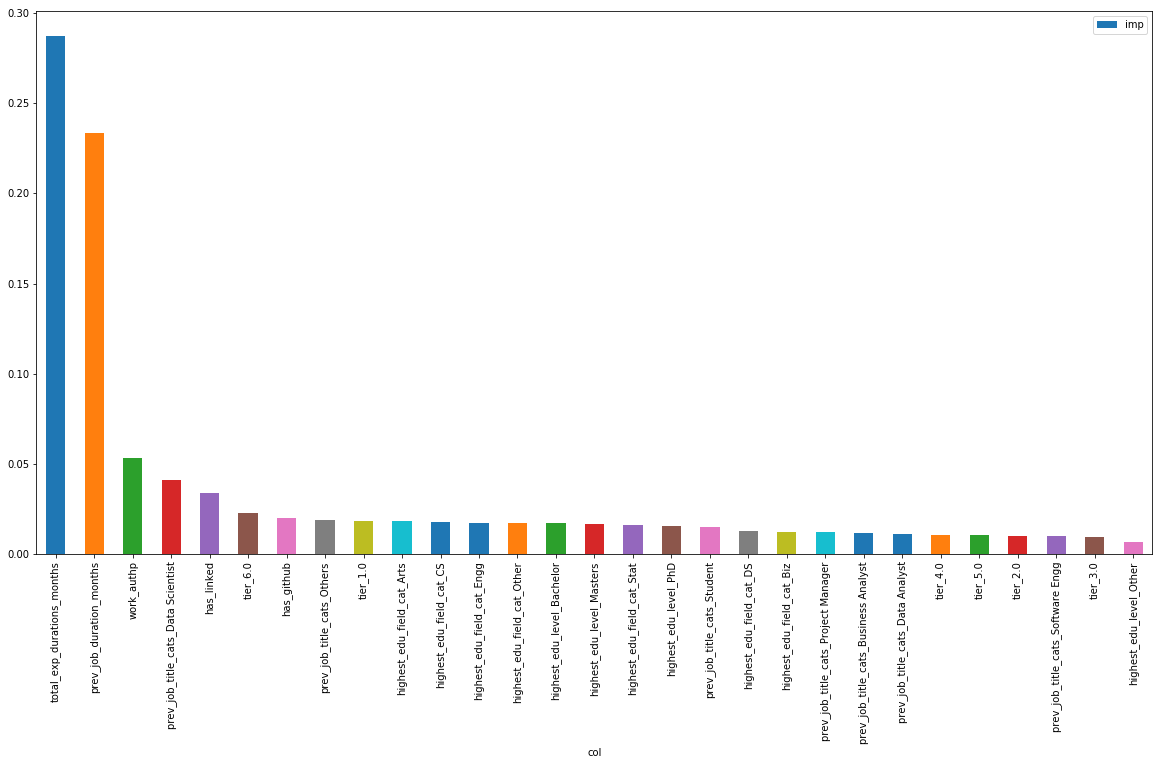

In [404]:
pd.DataFrame({'col':new_interest_data.columns, 'imp':clf.feature_importances_}).sort_values('imp', ascending=False).plot(x='col', y='imp', kind='bar', figsize=(20,10))

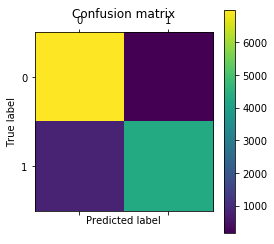

In [405]:
cm = confusion_matrix(data.target, clf.predict(new_interest_data))
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [722]:
data.corr()

,rb,current_job_duration_months,prev_job_duration_months,total_exp_durations_months,work_authp,skill_0,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10,skill_11,has_github,has_linked,data_current_comp_employee,data_current_comp_employee1,data_current_comp_employee2,data_current_comp_employeef,uni_corr,tier_education2_college,uni_corr2,tier_1.0,tier_2.0,tier_3.0,tier_4.0,tier_5.0,tier_6.0,comp_ds_count,target,prev_job_title_cats_le,highest_edu_level_le,highest_edu_field_cat_le,prev_job_title_cats_le_mean_enc,highest_edu_level_le_mean_enc,highest_edu_field_cat_le_mean_enc
rb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_job_duration_months,NaN,1.000000,0.187529,0.398306,0.094301,0.058707,0.027101,0.031998,0.031979,0.032453,0.030842,-0.095006,0.055400,-0.021025,-0.012352,0.032563,-0.005959,-0.114784,-0.102474,0.006403,0.008157,0.003946,0.013934,0.040107,NaN,NaN,-0.007066,-0.000708,-0.012591,-0.018911,-0.011248,0.025939,0.011670,-0.118478,0.005538,0.095700,-0.015656,-0.111268,0.026357,-0.038486
prev_job_duration_months,NaN,0.187529,1.000000,0.488838,0.116819,0.022555,0.029650,0.027638,0.014743,0.038806,0.037733,-0.039542,0.032363,-0.030429,-0.013243,0.021717,-0.017115,-0.047501,-0.045433,-0.007603,-0.009147,-0.008303,-0.006932,-0.074978,NaN,NaN,-0.015171,-0.021752,0.011500,0.006903,0.015028,0.006841,0.011519,-0.011355,-0.011494,0.092910,-0.042535,-0.082159,0.024544,-0.057724
total_exp_durations_months,NaN,0.398306,0.488838,1.000000,0.217162,0.098637,0.040597,0.057888,0.070572,0.050682,0.068936,-0.115821,0.058007,-0.013161,-0.026127,0.033648,-0.047949,-0.151207,-0.112295,-0.001381,-0.004856,-0.004856,0.002099,-0.074082,NaN,NaN,-0.041670,-0.043137,-0.017528,-0.028137,-0.022470,0.085336,-0.016776,-0.063543,-0.103855,0.127702,-0.062760,-0.041123,0.015374,-0.125627
work_authp,NaN,0.094301,0.116819,0.217162,1.000000,0.034641,0.026958,0.038469,0.044198,0.038405,0.021571,-0.061045,0.025169,-0.021289,-0.017681,0.036898,-0.015944,-0.029617,-0.062286,-0.019472,-0.029181,-0.023149,-0.030174,-0.083182,NaN,NaN,-0.043576,-0.011372,-0.024108,-0.033765,0.004757,0.065244,0.000722,-0.030116,-0.092027,-0.004799,-0.054789,-0.023725,-0.104986,-0.058605
skill_0,NaN,0.058707,0.022555,0.098637,0.034641,1.000000,-0.016829,0.010567,0.008410,-0.017979,0.011799,-0.156217,-0.004050,-0.067856,-0.077283,-0.000918,-0.177454,-0.039689,-0.032289,-0.000611,-0.003165,0.002636,0.005120,0.014524,NaN,NaN,-0.042595,0.002949,-0.029330,-0.010753,-0.012696,0.056677,0.013658,-0.055195,-0.034769,-0.038956,-0.006488,-0.027211,-0.065638,-0.046929
skill_1,NaN,0.027101,0.029650,0.040597,0.026958,-0.016829,1.000000,0.031651,0.027780,-0.000930,0.033425,-0.122563,0.021097,-0.103020,-0.080733,0.020588,-0.180825,-0.011160,0.012613,0.002312,0.002594,-0.000862,-0.002782,-0.049307,NaN,NaN,-0.004348,0.006055,-0.006100,-0.009022,0.000008,0.007666,-0.022691,-0.036898,-0.011836,-0.012799,-0.002313,-0.034355,-0.027373,-0.012727
skill_2,NaN,0.031998,0.027638,0.057888,0.038469,0.010567,0.031651,1.000000,0.061379,0.028691,0.071213,-0.142998,0.046988,-0.104828,-0.095974,0.062086,-0.178149,-0.028245,-0.006945,-0.015180,-0.018213,-0.012902,-0.012832,-0.042398,NaN,NaN,-0.002601,0.006602,-0.014348,0.013096,-0.006587,0.002293,-0.008813,-0.034674,0.003897,0.025420,-0.028467,-0.033447,-0.010112,-0.017142
skill_3,NaN,0.031979,0.014743,0.070572,0.044198,0.008410,0.027780,0.061379,1.000000,0.027886,0.067619,-0.140327,0.043597,-0.100714,-0.098317,0.051249,-0.182831,-0.025603,-0.003596,-0.010269,-0.014081,-0.006309,-0.009383,-0.053527,NaN,NaN,-0.021859,0.000004,-0.012642,-0.003412,-0.006894,0.027856,0.000381,-0.055205,-0.017438,-0.001304,-0.013054,-0.047978,-0.035676,-0.028937
skill_4,NaN,0.032453,0.038806,0.050682,0.038405,-0.017979,-0.000930,0.028691,0.027886,1.000000,0.032164,-0.132957,0.015737,-0.108017,-0.100110,0.020313,-0.160300,-0.029591,-0.002682,0